<a href="https://colab.research.google.com/github/sudinisreeja/Visa-Status-Prediction-/blob/main/Milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = pd.read_csv('/content/Visa Status Prediction Cleaned Dataset.csv')
print(data.head())

   S.NO CASE_STATUS                                  EMPLOYER_NAME  \
0     1   CERTIFIED                                INFOSYS LIMITED   
1     2   CERTIFIED                                INFOSYS LIMITED   
2     3   CERTIFIED                            KRONOS INCORPORATED   
3     4   CERTIFIED  UNIVERSITY OF MIAMI-MILLER SCHOOL OF MEDICINE   
4     5   CERTIFIED               LARSEN & TOUBRO INFOTECH LIMITED   

                          SOC_NAME                 JOB_TITLE  AGE GENDER  \
0        COMPUTER SYSTEMS ANALYSTS      TECHNOLOGY LEAD - US   70      F   
1  COMPUTER OCCUPATIONS, ALL OTHER  TECHNICAL TEST LEAD - US   69      F   
2          DATABASE ADMINISTRATORS    DATABASE ADMINISTRATOR   54      F   
3    BIOCHEMISTS AND BIOPHYSICISTS  SR. RESEARCH ASSOCIATE 1   55      M   
4   BUSINESS INTELLIGENCE ANALYSTS          BUSINESS ANALYST   49      M   

  FULL_TIME_POSITION  PREVAILING_WAGE  YEAR                   WORKSITE  \
0                  Y          84032.0  2015     

In [7]:
data['APPLICATION DATE']= pd.to_datetime(data['APPLICATION DATE'], dayfirst=True, errors='coerce')
data['DECISION DATE']= pd.to_datetime(data['DECISION DATE'], dayfirst=True, errors='coerce')
data["processing_days"] = (data["DECISION DATE"] - data["APPLICATION DATE"]).dt.days
print("\nAfter calculating processing days:\n", data)


After calculating processing days:
      S.NO CASE_STATUS                                  EMPLOYER_NAME  \
0       1   CERTIFIED                                INFOSYS LIMITED   
1       2   CERTIFIED                                INFOSYS LIMITED   
2       3   CERTIFIED                            KRONOS INCORPORATED   
3       4   CERTIFIED  UNIVERSITY OF MIAMI-MILLER SCHOOL OF MEDICINE   
4       5   CERTIFIED               LARSEN & TOUBRO INFOTECH LIMITED   
..    ...         ...                                            ...   
98     99   CERTIFIED                       HEALTHCARE PARTNERS, LLC   
99    100   WITHDRAWN                                    ARTEX, INC.   
100   101   CERTIFIED                                 WORLDVIZ, INC.   
101   102   CERTIFIED        ALTISOURCE ASSET MANAGEMENT CORPORATION   
102   103   WITHDRAWN                                  PARKLOCO INC.   

                            SOC_NAME  \
0          COMPUTER SYSTEMS ANALYSTS   
1    COMPUTER OCCU

In [10]:
print(df["processing_days"].describe())
# basic statiscal/numerical summary- EDA

count    102.000000
mean      50.588235
std       59.956808
min        2.000000
25%       26.000000
50%       33.000000
75%       59.000000
max      389.000000
Name: processing_days, dtype: float64


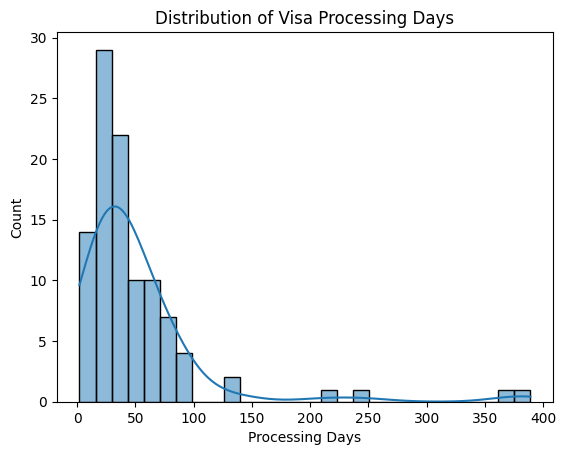

In [11]:
sns.histplot(df["processing_days"], kde=True) # kde uses smooth density curve
plt.title("Distribution of Visa Processing Days")
plt.xlabel("Processing Days")
plt.ylabel("Count")
plt.show()

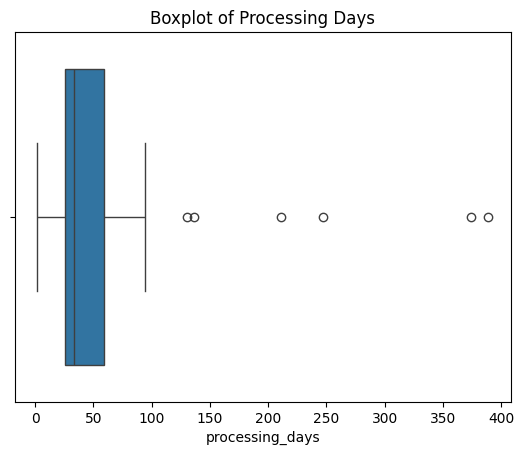

In [12]:
sns.boxplot(x=df["processing_days"]) # outlier detection- box plot
plt.title("Boxplot of Processing Days")
plt.show()

In [16]:
# preparing the data for correlation
df['APPLICATION DATE'] = pd.to_datetime(df['APPLICATION DATE'], dayfirst=True, errors='coerce')
df["application_month"] = df["APPLICATION DATE"].dt.month
print(df)

     S.NO CASE_STATUS                                  EMPLOYER_NAME  \
0       1   CERTIFIED                                INFOSYS LIMITED   
1       2   CERTIFIED                                INFOSYS LIMITED   
2       3   CERTIFIED                            KRONOS INCORPORATED   
3       4   CERTIFIED  UNIVERSITY OF MIAMI-MILLER SCHOOL OF MEDICINE   
4       5   CERTIFIED               LARSEN & TOUBRO INFOTECH LIMITED   
..    ...         ...                                            ...   
98     99   CERTIFIED                       HEALTHCARE PARTNERS, LLC   
99    100   WITHDRAWN                                    ARTEX, INC.   
100   101   CERTIFIED                                 WORLDVIZ, INC.   
101   102   CERTIFIED        ALTISOURCE ASSET MANAGEMENT CORPORATION   
102   103   WITHDRAWN                                  PARKLOCO INC.   

                            SOC_NAME  \
0          COMPUTER SYSTEMS ANALYSTS   
1    COMPUTER OCCUPATIONS, ALL OTHER   
2            DA

/tmp/ipython-input-557/2900726894.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['APPLICATION DATE'] = pd.to_datetime(df['APPLICATION DATE'], dayfirst=True, errors='coerce')


In [17]:
corr_matrix = df[["processing_days", "application_month"]].corr() # calculates the correlation values
print(corr_matrix)

# range: +1-> strong +ve relationship, 0-> no relationship, -1 -> strong -ve relationship

                   processing_days  application_month
processing_days           1.000000           0.071258
application_month         0.071258           1.000000


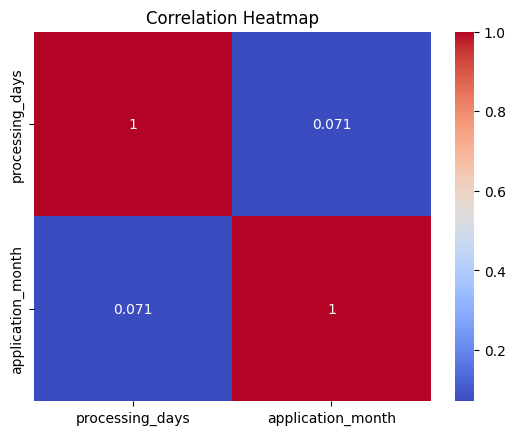

In [18]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") # annot- shows nos inside the boxes, cmap- color scale for strnegth
plt.title("Correlation Heatmap")
plt.show()

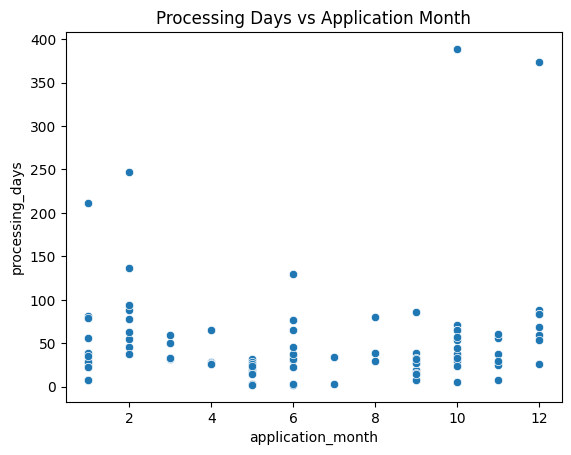

In [19]:
sns.scatterplot(
    x="application_month",
    y="processing_days",
    data=df
)
plt.title("Processing Days vs Application Month")
plt.show()


# **FEATURE 1 APPLICATION MONTH**

In [21]:
print(df[["APPLICATION DATE", "application_month"]])

    APPLICATION DATE  application_month
0         2018-06-18                  6
1         2018-09-23                  9
2         2019-01-12                  1
3         2019-01-27                  1
4         2019-06-04                  6
..               ...                ...
98        2023-02-20                  2
99        2023-06-07                  6
100       2023-10-25                 10
101       2014-02-14                  2
102       2017-01-29                  1

[103 rows x 2 columns]


# **FEATURE 2**

In [ ]:
df["season"]= df["application_month"].apply(
    lambda x: "Peak" if x in [1,2,12] else "off-peak"
) # runs the logic row by row

print(df[["application_month", "season"]])

In [23]:
worksite_avg= df.groupby("WORKSITE")["processing_days"].mean()
print(worksite_avg)

WORKSITE
ALBUQUERQUE, NEW MEXICO       60.0
ALPHARETTA, GEORGIA           54.0
ASHLAND, KENTUCKY             50.0
ATLANTA, GEORGIA               8.0
AUSTIN, TEXAS                 49.5
                              ... 
WEST LAFAYETTE, INDIANA       54.0
WEST PALM BEACH, FLORIDA      28.0
WILLIAMSVILLE, NEW YORK       33.0
WILMINGTON, DELAWARE          35.0
WOODCLIFF LAKE, NEW JERSEY    38.0
Name: processing_days, Length: 83, dtype: float64


In [25]:
df["worksite_avg_processing_days"]= df["WORKSITE"].map(worksite_avg)
print(df)

     S.NO CASE_STATUS                                  EMPLOYER_NAME  \
0       1   CERTIFIED                                INFOSYS LIMITED   
1       2   CERTIFIED                                INFOSYS LIMITED   
2       3   CERTIFIED                            KRONOS INCORPORATED   
3       4   CERTIFIED  UNIVERSITY OF MIAMI-MILLER SCHOOL OF MEDICINE   
4       5   CERTIFIED               LARSEN & TOUBRO INFOTECH LIMITED   
..    ...         ...                                            ...   
98     99   CERTIFIED                       HEALTHCARE PARTNERS, LLC   
99    100   WITHDRAWN                                    ARTEX, INC.   
100   101   CERTIFIED                                 WORLDVIZ, INC.   
101   102   CERTIFIED        ALTISOURCE ASSET MANAGEMENT CORPORATION   
102   103   WITHDRAWN                                  PARKLOCO INC.   

                            SOC_NAME  \
0          COMPUTER SYSTEMS ANALYSTS   
1    COMPUTER OCCUPATIONS, ALL OTHER   
2            DA

# **FEATURE 4**

In [27]:
visa_avg= df.groupby("VISA TYPE")["processing_days"].mean()
df["visa_avg"] = df["VISA TYPE"].map(visa_avg)
print(df)

     S.NO CASE_STATUS                                  EMPLOYER_NAME  \
0       1   CERTIFIED                                INFOSYS LIMITED   
1       2   CERTIFIED                                INFOSYS LIMITED   
2       3   CERTIFIED                            KRONOS INCORPORATED   
3       4   CERTIFIED  UNIVERSITY OF MIAMI-MILLER SCHOOL OF MEDICINE   
4       5   CERTIFIED               LARSEN & TOUBRO INFOTECH LIMITED   
..    ...         ...                                            ...   
98     99   CERTIFIED                       HEALTHCARE PARTNERS, LLC   
99    100   WITHDRAWN                                    ARTEX, INC.   
100   101   CERTIFIED                                 WORLDVIZ, INC.   
101   102   CERTIFIED        ALTISOURCE ASSET MANAGEMENT CORPORATION   
102   103   WITHDRAWN                                  PARKLOCO INC.   

                            SOC_NAME  \
0          COMPUTER SYSTEMS ANALYSTS   
1    COMPUTER OCCUPATIONS, ALL OTHER   
2            DA

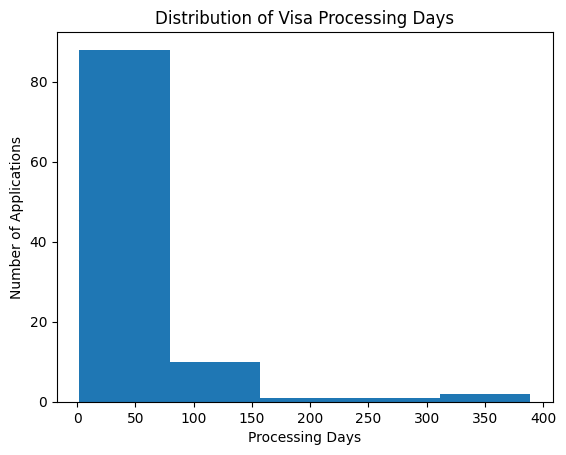

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["processing_days"], bins=5)

plt.title("Distribution of Visa Processing Days")
plt.xlabel("Processing Days")
plt.ylabel("Number of Applications")

plt.show()

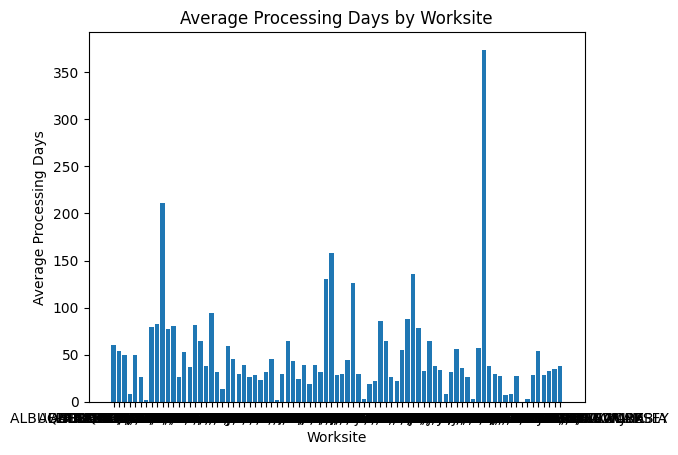

In [30]:
plt.figure()
plt.bar(worksite_avg.index, worksite_avg.values)

plt.title("Average Processing Days by Worksite")
plt.xlabel("Worksite")
plt.ylabel("Average Processing Days")

plt.show()

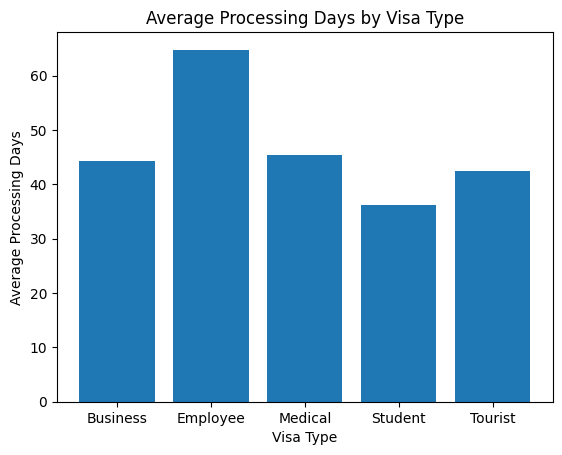

In [32]:
visa_avg = df.groupby("VISA TYPE")["processing_days"].mean()

plt.figure()
plt.bar(visa_avg.index, visa_avg.values)

plt.title("Average Processing Days by Visa Type")
plt.xlabel("Visa Type")
plt.ylabel("Average Processing Days")

plt.show()

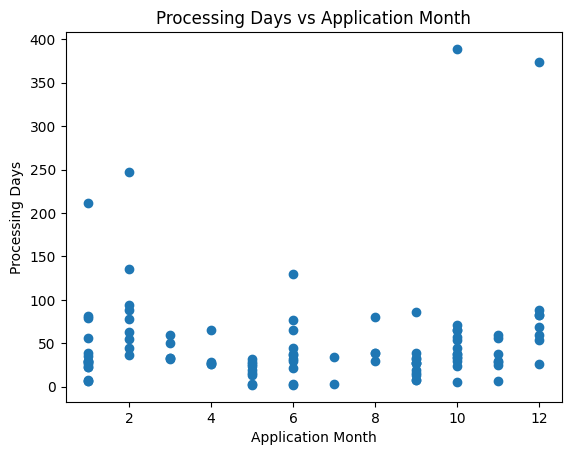

In [33]:
plt.figure()
plt.scatter(df["application_month"], df["processing_days"])

plt.title("Processing Days vs Application Month")
plt.xlabel("Application Month")
plt.ylabel("Processing Days")

plt.show()

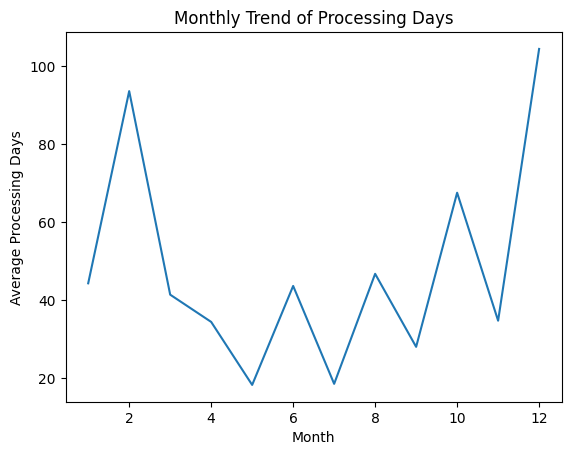

In [34]:
monthly_avg = df.groupby("application_month")["processing_days"].mean()

plt.figure()
plt.plot(monthly_avg.index, monthly_avg.values)

plt.title("Monthly Trend of Processing Days")
plt.xlabel("Month")
plt.ylabel("Average Processing Days")

plt.show()